**Auto-regressive (AR) and moving average (MA) models** are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as **auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models**.

The main assumption of AR model is that the time series data is **stationary**.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

When the time series data is not stationary, then we convert the non-stationary data before applying AR models.

**The Augmented Dickey Fuller Test (ADF)** is unit root test for stationarity. 

***The null hypothesis*** is that time series is non-stationary. Alternative hypothesis is that time series is stationary.

**AR Model indentification**


> Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)


***Auto correlation Function (ACF)***

A plot of auto-correlation of different lags is called ACF.

The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

***Partial Autocorrelation Function (PACF)***

A plot of partial auto-correlation for different values of lags is called PACF.

The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

* The model is AR if the ACF trails oﬀ after a lag and has a hard cut-oﬀ in the PACF after a lag. This lag is taken as the value for **p**.

* The model is MA if the PACF trails oﬀ after a lag and has a hard cut-oﬀ in the ACF after the lag. This lag value is taken as the value for **q**.

* The model is a mix of AR and MA if both the ACF and PACF trail oﬀ.

For an ARIMA (p,d,q) process, it becomes non-stationary to stationary after differencing it for **d** times.

**Plot ACF and PACF**

In [ ]:
from   statsmodels.tsa.stattools  import  adfuller
data= pd.read_csv('/kaggle/input/time-series-data/TractorSales.csv', header=0, parse_dates=[0], squeeze=True)

dates= pd.date_range(start='2003-01-01', freq='MS', periods=len(data))

data['Month']= dates.month
data['Month']= data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year']= dates.year

data.drop(['Month-Year'], axis=1, inplace=True)
data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)

data= data[['Month', 'Year', 'Tractor-Sales']]
data.set_index(dates, inplace=True)

sales_ts = data['Tractor-Sales']

result = adfuller(sales_ts) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

p-value > 0.1 --> This series is not stationary. Try differencing - lag 1

In [ ]:
sales_ts_diff   = sales_ts - sales_ts.shift(periods=1)   # Lấy sai phân lần 1
sales_ts_diff.dropna(inplace=True)

result = adfuller(sales_ts_diff) 

pval              = result[1]
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 

if pval < 0.05:
    print('Data is stationary')
else:
    print('Data after differencing is not stationary; so try log diff')   # Lấy sai phân log lần 1
    sales_ts_log      = np.log10(sales_ts)
    sales_ts_log.dropna(inplace=True)
    sales_ts_log_diff = sales_ts_log.diff(periods=1)
    sales_ts_log_diff.dropna(inplace=True)
    result            = adfuller(sales_ts_log_diff) 

    pval              = result[1]
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1]) 
    if pval < 0.05:
        print('Data after log differencing is stationary')
    else:
        print('Data after log differencing is not stationary; try second order differencing')    # Lấy sai phân log lần 2
        sales_ts_log_diff2 = sales_ts_log.diff(periods = 2)
        sales_ts_log_diff2.dropna(inplace=True)
        result         =   adfuller(sales_ts_log_diff2) 
        pval              = result[1]
        print('ADF Statistic: %f' % result[0]) 
        print('p-value: %f' % result[1]) 
        if pval < 0.05:
            print('Data after log differencing 2nd order is stationary')
        else:
            print('Data after log differencing 2nd order is not stationary')

In [ ]:
#ACF and PACF plots:
from   statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt


lag_acf    =   acf(sales_ts_log_diff2,   nlags=20)
lag_pacf   =   pacf(sales_ts_log_diff2, nlags=20, method='ols')

#Plot ACF: 

plt.figure(figsize = (15,5))
plt.subplot(121) 
plt.stem(lag_acf)
plt.axhline(y = 0, linestyle='--',color='black')
plt.axhline(y = -1.96/np.sqrt(len(sales_ts_log_diff2)),linestyle='--',color='gray')
plt.axhline(y = 1.96/np.sqrt(len(sales_ts_log_diff2)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
#Plot PACF:

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.axhline(y =-1.96/np.sqrt(len(sales_ts_log_diff2)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(sales_ts_log_diff2)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

plt.show()

**Dự báo Chuỗi dừng hay không, bằng Random walk**

In [ ]:
from random import  seed, random
seed(1) 
random_walk = list() 
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000): 
    movement = -1 if random() < 0.5 else 1 
    value    = random_walk[i-1] + movement 
    random_walk.append(value) 
    
pd.plotting.autocorrelation_plot(random_walk) 
plt.show()

In [ ]:
### Check stationary property

result = adfuller(random_walk) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 
for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))

In [ ]:
# prepare dataset for predicting a random walk

training_size     = int(len(random_walk) * 0.70) 
training, test    = random_walk[0 : training_size], random_walk[training_size:]  

predictions       = list() 
hist              = training[-1] 

for i in range(len(test)): 
    yhat = hist 
    predictions.append(yhat) 
    hist = test[i] 
    
rmse = np.sqrt(mean_squared_error(test, predictions))  
print('\n\nPredicting a Random Walk \n RMSE: %.3f' % rmse)

We see a trend in the n observations at autocorrelation plot for Random walk.

We observe that the random walk is (stationary) or (non-stationary) since the p value (< 0.05) or (>0.05).

We know the variation from one time step to the next is either -x or x and we get RMSE as x.

**ARIMA model**

Let's see the example of data from quandel. The data descibes the bank of England's official statistics on spot exchange rates for the EURO into US dollars.

In [ ]:
import pandas as pd 
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
pip install quandl

In [ ]:
QUANDL_KEY = '...' # fill {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

In [ ]:
bank_df = quandl.get(dataset='BOE/XUDLERD',
                       start_date='1975-01-02', 
                       end_date='2017-11-09')

In [ ]:
print(f'Downloaded {bank_df.shape[0]} rows of data.')

bank_df 

Downloaded 10837 rows of data.


,Value
Date,
1975-01-02,0.7633
1975-01-03,0.7585
1975-01-06,0.7524
1975-01-07,0.7510
1975-01-08,0.7554
...,...
2017-11-03,0.8608
2017-11-06,0.8631
2017-11-07,0.8639


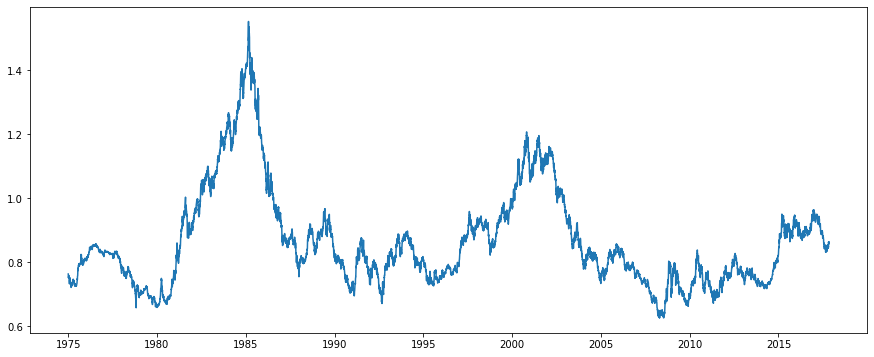

In [ ]:
plt.plot(bank_df)

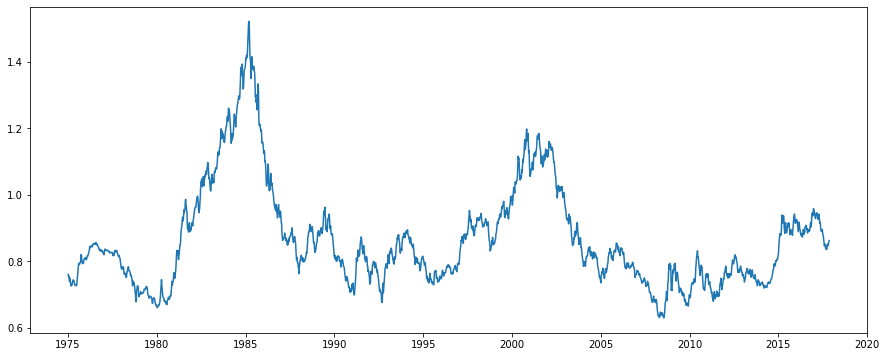

In [ ]:
#Resample the data as it contains too much variations 

ts_week = bank_df.resample('W').mean()
plt.plot(ts_week)

**Check for stationarity using dickey fuller test**

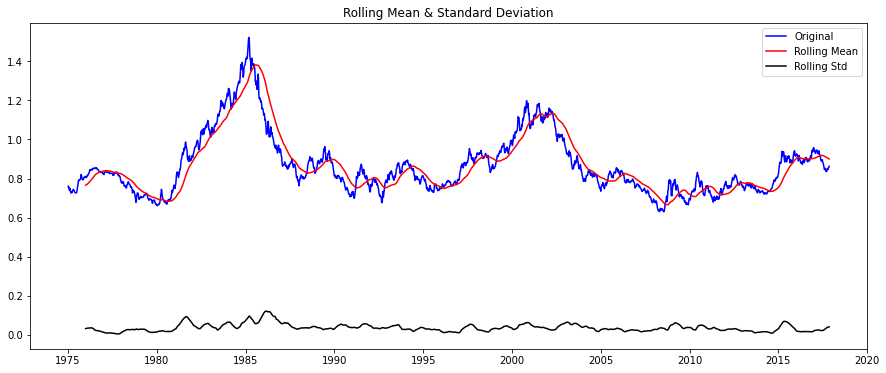

Results of Dickey-Fuller Test:
Test Statistic                   -2.076341
p-value                           0.254134
#Lags Used                        2.000000
Number of Observations Used    2234.000000
Critical Value (1%)              -3.433281
Critical Value (5%)              -2.862835
Critical Value (10%)             -2.567459
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(ts_week['Value'])

Since the test statistics is more than 5 % critical value and the p-value is larger than 0.05 , the moving average is not constant over time and the null hypothesis of the Dickey-Fuller test cannot be rejected. This shows the weekly time series is not stationary.

As such , we need to transform this series into a stationary time series.

**Differencing (lấy sai phân)**

We can apply the concept of differencing to stationarize the data. Before differencing it is better to do the log trasnsformation of the data

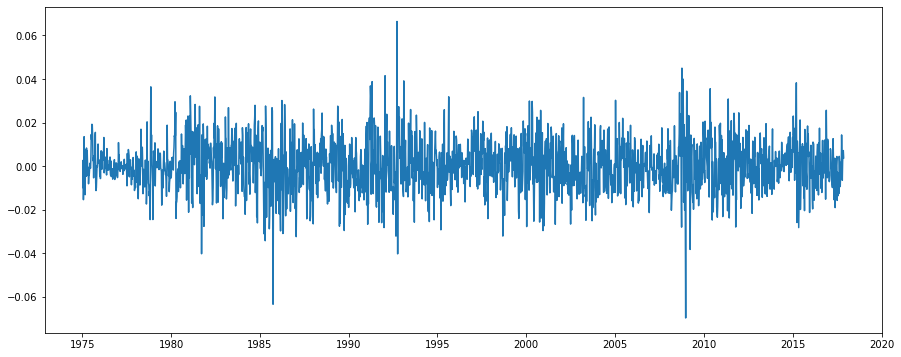

In [ ]:
ts_week_log = np.log(ts_week)
ts_week_log_diff = ts_week_log - ts_week_log.shift()
plt.plot(ts_week_log_diff)

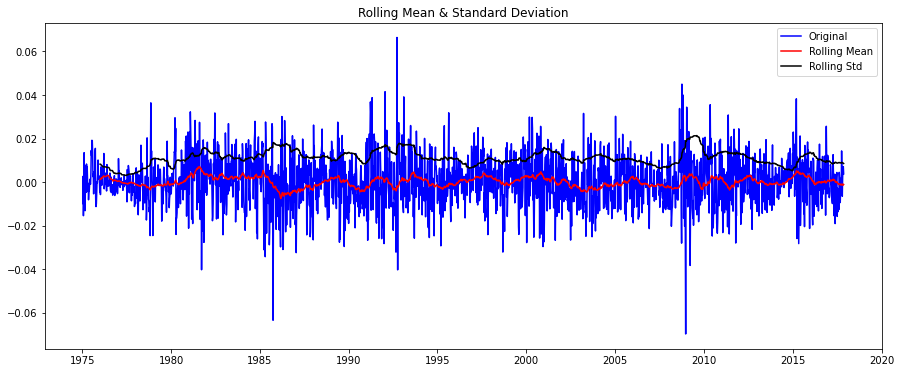

Results of Dickey-Fuller Test:
Test Statistic                  -36.590004
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2235.000000
Critical Value (1%)              -3.433279
Critical Value (5%)              -2.862834
Critical Value (10%)             -2.567459
dtype: float64


In [ ]:
# Again confirming with the dickey-fuller test 

ts_week_log_diff.dropna(inplace=True)
test_stationarity(ts_week_log_diff['Value'])

The test statistic is less than 1% of the critical value, shows that the time series is stationary with 99% confidence. Now we can apply the statistical models like ARIMA to forecast the future values

In [ ]:
#ACF and PACF
lag_acf = acf(ts_week_log_diff, nlags=10)
lag_pacf = pacf(ts_week_log_diff, nlags=10, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


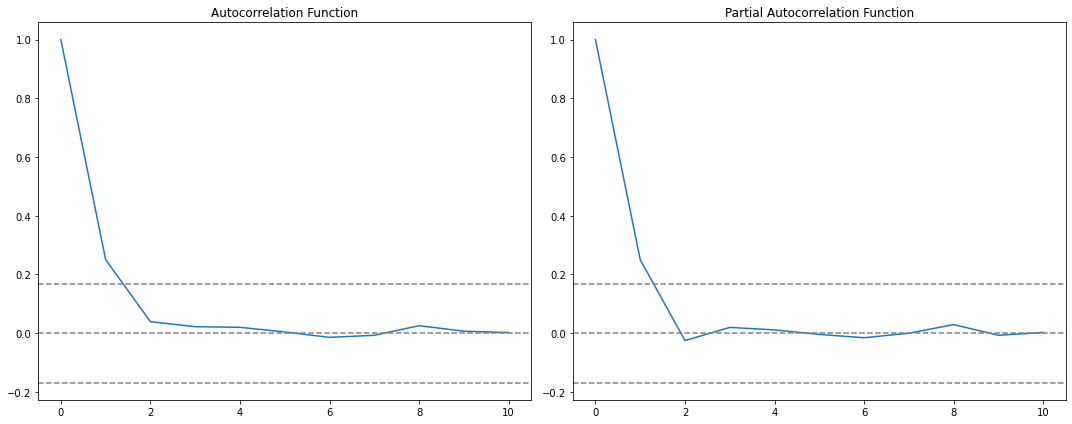

In [ ]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_week_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Using the plot we can determine the values for p and q respectively :

p: the lag value where the PACF cuts off (drop to 0) for the first time. So here p =2.

q: the lag value where the ACF chart crosses the upper confidence interval for the first time. if you look closely q=1.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


ADF test statistic: -36.59 (p-val: 0.00)
KPSS test statistic: 0.06 (p-val: 0.10)


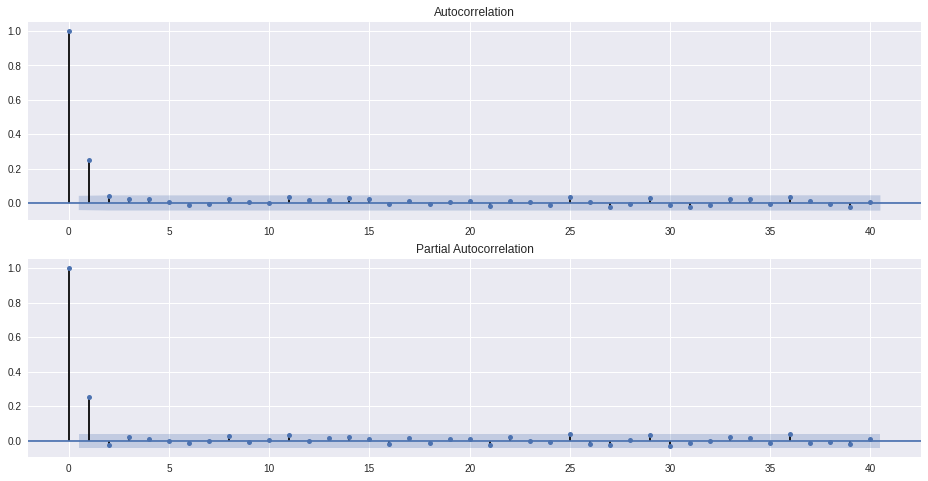

In [ ]:
from Chuong_3_utils import test_autocorrelation
fig = test_autocorrelation(ts_week_log_diff['Value'].dropna())

Text(0.5, 1.0, 'RSS: 0.2806')

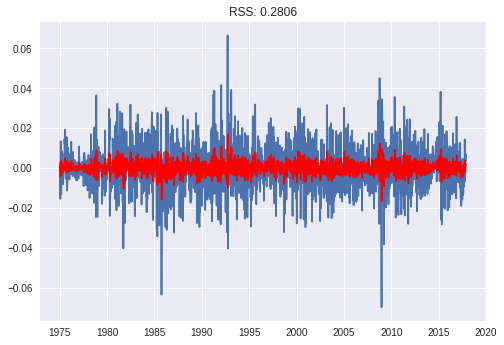

In [ ]:
# Optimal values fot ARIMA(p,d,q) model are (2,1,1). Hence plot the ARIMA model using the value (2,1,1)
model = ARIMA(ts_week_log['Value'], order=(2, 1, 1))  # Set up bằng mô hình chưa lấy sai phân, để ARIMA tự láy sai phân.
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_week_log_diff['Value'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_week_log_diff['Value'])**2))

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                 2236
Model:                 ARIMA(2, 1, 1)   Log Likelihood                6870.601
Method:                       css-mle   S.D. of innovations              0.011
Date:                Fri, 28 Jan 2022   AIC                         -13731.202
Time:                        03:04:08   BIC                         -13702.640
Sample:                    01-12-1975   HQIC                        -13720.773
                         - 11-12-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.51e-05      0.000      0.178      0.859      -0.001       0.001
ar.L1.D.Value    -0.0900      0.487     -0.185      0.853      -1.044       0.864
ar.L2.D.Value     0.0602      0.128     

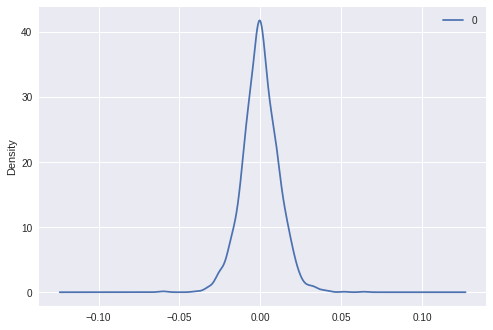

In [ ]:
# print the results of the ARIMA model and plot the residuals

print(results_ARIMA.summary())
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())

In [ ]:
#Predictions 

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
1975-01-12    0.000055
1975-01-19   -0.002420
1975-01-26    0.000987
1975-02-02   -0.004103
1975-02-09   -0.001134
Freq: W-SUN, dtype: float64


In [ ]:
print(ts_week_log_diff.head())

               Value
Date                
1975-01-12 -0.009826
1975-01-19  0.002651
1975-01-26 -0.015447
1975-02-02 -0.006555
1975-02-09  0.013494


The model is returning the results we want to see, we can scale the model predictions back to the original scale. Hence the remove the first order differencing and take exponent to restore the predictions back to their original scale.

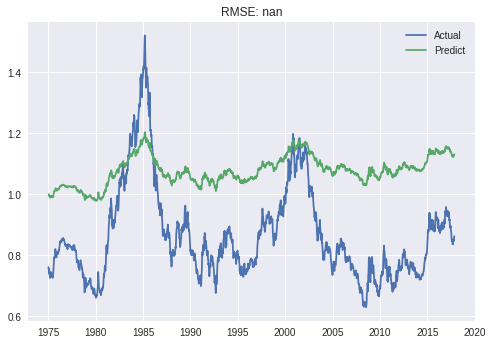

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_week_log.iloc[0], index=ts_week_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_week, label='Actual')
plt.plot(predictions_ARIMA, label='Predict')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_week['Value'])**2)/len(ts_week)))
plt.legend()
plt.show()

In [ ]:
#Training and testing datsets
size = int(len(ts_week_log) - 15)
train, test = ts_week_log[0:size], ts_week_log[size:len(ts_week_log)]
history = [x for x in train]
predictions = list()

#Training the model and forecasting 
size = int(len(ts_week_log) - 15)
train, test = ts_week_log['Value'][0:size], ts_week_log['Value'][size:len(ts_week_log)]
history = [x for x in train]
predictions = list()
print('Printing Predicted vs Expected Values...')
print('\n')

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))

Printing Predicted vs Expected Values...


predicted=0.860853, expected=0.862600


In [ ]:
#Validating the model 

error = mean_squared_error(test, predictions)
print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)
predictions_series = pd.Series(predictions, index = test.index)



Printing Mean Squared Error of Predictions...
Test MSE: 0.000043


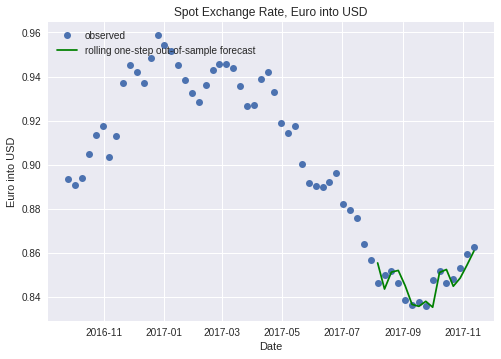

In [ ]:
# Plotting forecasted vs Observed values 

fig, ax = plt.subplots()
ax.set(title='Spot Exchange Rate, Euro into USD', xlabel='Date', ylabel='Euro into USD')
ax.plot(ts_week[-60:], 'o', label='observed')
ax.plot(np.exp(predictions_series), 'g', label='rolling one-step out-of-sample forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')

**AUTO ARIMA**

**auto.arima**

The module auto.arima fits the best ARIMA model to univariate time series according to either AIC, AICc or BIC value. This function conducts a search over possible model within the order constraints provided.

**AIC**

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

AICc is AIC with a correction for small sample sizes.

**BIC**

Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

We use tractor sales data to replicate auto.arima in python

In [ ]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

In [ ]:
tractor_sales_Series = pd.read_csv("/kaggle/input/time-series-data/TractorSales.csv")
tractor_sales_Series.head(5)

In [ ]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(tractor_sales_Series))

In [ ]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [ ]:
#data.drop(['Month-Year'], axis=1, inplace=True)
data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
data = data[['Month', 'Year', 'Tractor-Sales']]

In [ ]:
data.set_index(dates, inplace=True)

In [ ]:
# extract out the time-series
sales_ts = data['Tractor-Sales']

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

We observe both trend and multiplicative seasonaliy from the plot shown above.

We try moving averages of various window widths such as 4, 6,8 and 12.

In [ ]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
#Determing rolling statisticsa
rolmean = sales_ts.rolling(window = 4).mean()
rolstd = sales_ts.rolling(window = 4).std()

#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

Dickey-Fuller Test - Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sales_ts)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values.

So this is a non-stationary time series.

**Seasonality – Time Series Decomposition**

Observe how number of tractors sold vary on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [ ]:
monthly_sales_data = pd.pivot_table(data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data

In [ ]:
# Vì thứ tự bên trên sắp xếp tháng theo chữ cái nên ta sẽ tiến hành reindex lại theo đúng thứ tự tháng
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

In [ ]:
monthly_sales_data.plot()

In [ ]:
yearly_sales_data = pd.pivot_table(data, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

In [ ]:
yearly_sales_data.plot()

In [ ]:
yearly_sales_data.boxplot()

**Time Series Decomposition**

In [ ]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [ ]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

Nonstationary series have an ACF that remains significant for half a dozen or more lags, rather than quickly declining to zero. You must difference such a series until it is stationary before you can identify the process

The above ACF is “decaying”, or decreasing, very slowly, and remains well above the significance range (blue band) for at least a dozen lags. This is indicative of a non-stationary series.

(Có nghĩa là nếu ACF không giảm xuống 0 trong khoảng 12 lags và không giảm xuống nằm trong dải xanh dương trong khoảng 10 lags thì chuỗi đó không dừng.)

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
seasonal_pdq

In [ ]:
#Separate data into train and test
data['date'] = data.index
train = data[data.index < '2013-01-01']
test = data[data.index >= '2013-01-01']
train_sales_ts_log = np.log10(train['Tractor-Sales'])

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

For ARIMA(p, d, q) × (P, D, Q)S, we got SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model with the least AIC:-600.0908420381976

Here,

p = non-seasonal AR order = 0,

d = non-seasonal differencing = 1,

q = non-seasonal MA order = 1,

P = seasonal AR order = 1,

D = seasonal differencing = 0,

Q = seasonal MA order = 1,

S = time span of repeating seasonal pattern = 12

**Predict sales on in-sample date using the best fit ARIMA model**

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

pred_dynamic_ci = pred_dynamic.conf_int()

pred99 = best_results.get_forecast(steps=24, alpha=0.1)

# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)
testCopy

In [ ]:
# Compute the root mean square error
mse = ((testCopy['Tractor-Sales'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

In [ ]:
axis = train['Tractor-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Tractor-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

**Forecast sales using the best fit ARIMA model**

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
n_steps = 36
idx = pd.date_range(data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

In [ ]:
# plot the forecast along with the confidence band

axis = sales_ts.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

**Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction**

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

The KDE plot of the residuals on the top right is almost similar with the normal distribution.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations coupled with the fact that there are no spikes outside the insignificant zone for both ACF and PACF plots lead us to conclude that that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It sems that our ARIMA model is working fine.

Nguồn: https://www.kaggle.com/saurav9786/time-series-tutorial/notebook#15.AUTO-REGRESSIVE-Models-